# Generating a random array of data

In [1]:
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import xrft

In [26]:
ny, nx = (128, 256)
data = np.random.rand(ny, nx)
da = xr.DataArray(data, dims=['y', 'x'])
da

<xarray.DataArray (y: 128, x: 256)> Size: 262kB
array([[0.88968539, 0.74064614, 0.59453506, ..., 0.17445117, 0.62043707,
        0.07025851],
       [0.38858956, 0.42663919, 0.48578377, ..., 0.37092823, 0.6957887 ,
        0.80715807],
       [0.40722446, 0.09721176, 0.30082707, ..., 0.19646304, 0.38267293,
        0.38278677],
       ...,
       [0.57602799, 0.36328221, 0.6967874 , ..., 0.74043159, 0.84415799,
        0.53426788],
       [0.84462829, 0.54363617, 0.65068909, ..., 0.92969311, 0.57875348,
        0.86064897],
       [0.8121077 , 0.02579843, 0.63296772, ..., 0.74728842, 0.58131951,
        0.62112072]])
Dimensions without coordinates: y, x

## Plot unfiltered data

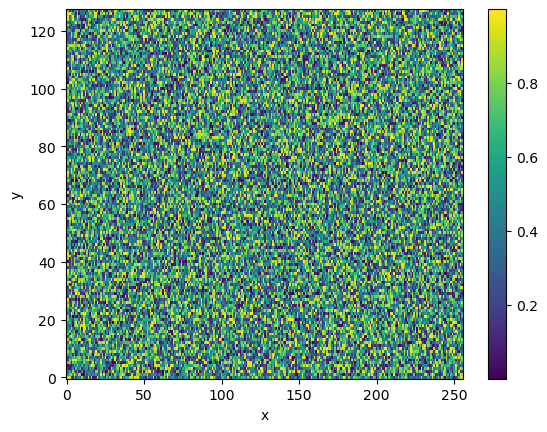

In [3]:
da.isel(time=0).plot()

## Create Low-Pass Butterworth Filter in x- and y-directions

In [27]:
# Define spatial sampling frequencies (fs_y and fs_x)
fs_y = ny  # Sampling frequency in y-direction (adjust based on real data)
fs_x = nx  # Sampling frequency in x-direction (adjust based on real data)

# Define cutoff frequencies (choose based on scale of features to remove)
cutoff_y = 50  # Keep features larger than this in y-direction
cutoff_x = 50  # Keep features larger than this in x-direction

# Set Nyquist frequencies
nyq_y = cutoff_y / (fs_y / 2)
nyq_x = cutoff_x / (fs_x / 2)

# Design Butterworth filters separately for y and x directions
order = 4
b_y, a_y = signal.butter(order, nyq_y, btype='low')  # y-axis filter
b_x, a_x = signal.butter(order, nyq_x, btype='low')  # x-axis filter

In [28]:
# Function to apply 2D Butterworth filtering
def butterworth_2d(image, b_y, a_y, b_x, a_x):
    filtered = signal.filtfilt(b_y, a_y, image, axis=0)  # Filter along y-axis
    filtered = signal.filtfilt(b_x, a_x, filtered, axis=1)  # Filter along x-axis
    return filtered

In [29]:
# Apply the filter directly
filtered_data = butterworth_2d(da, b_y, a_y, b_x, a_x)
filtered_da = xr.DataArray(filtered_data, dims=['y', 'x'])
filtered_da

<xarray.DataArray (y: 128, x: 256)> Size: 262kB
array([[0.89114081, 0.78028967, 0.6502041 , ..., 0.57516161, 0.33957238,
        0.06872386],
       [0.39875138, 0.44261615, 0.57021214, ..., 0.50999038, 0.64001408,
        0.75729298],
       [0.39454981, 0.1705452 , 0.14267003, ..., 0.29864245, 0.38537974,
        0.45153827],
       ...,
       [0.63236298, 0.54617873, 0.49969789, ..., 0.91858122, 0.77144671,
        0.43461086],
       [0.81498323, 0.60380076, 0.48835382, ..., 0.85056372, 0.87723222,
        0.91736547],
       [0.81079634, 0.51619078, 0.47035139, ..., 0.70529288, 0.69276001,
        0.61695763]])
Dimensions without coordinates: y, x

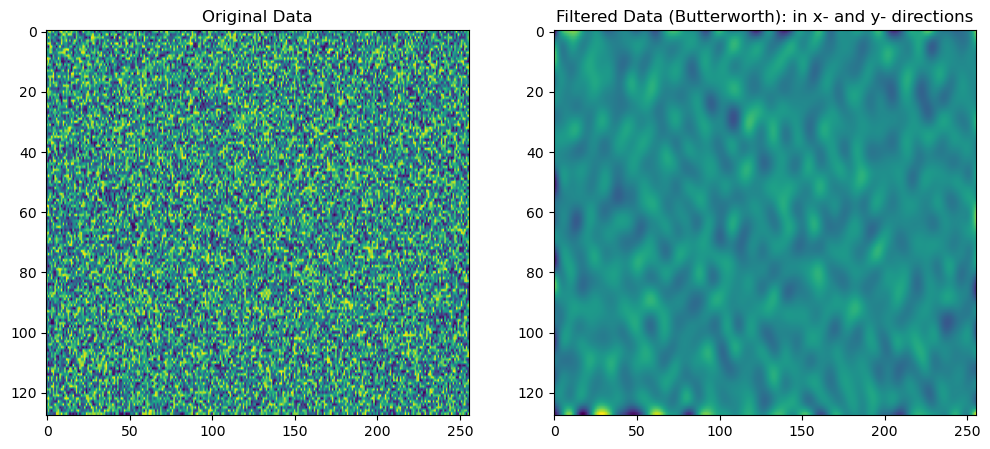

In [22]:
# Plot original and filtered data
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(da, cmap="viridis", aspect="auto")
ax[0].set_title("Original Data")
ax[1].imshow(filtered_da, cmap="viridis", aspect="auto")
ax[1].set_title("Filtered Data (Butterworth): in x- and y- directions")
plt.show()

## Plot power spectra

/srv/conda/envs/notebook/lib/python3.12/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.12/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(


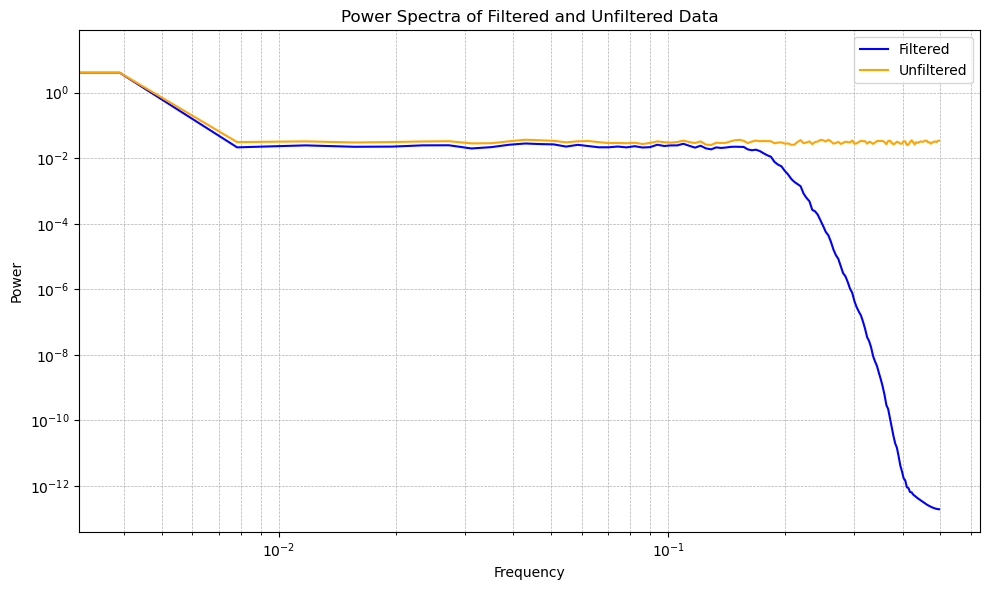

In [31]:
# Compute power spectrum for mean prediction and target
ps_filtered = xrft.power_spectrum(filtered_da, dim='x', window=True).mean(dim='y')
ps_unfiltered = xrft.power_spectrum(da, dim='x', window=True).mean(dim='y')

# Plot power spectra
plt.figure(figsize=(10, 6))
plt.plot(ps_filtered.freq_x, ps_filtered, label='Filtered', color='blue')
plt.plot(ps_unfiltered.freq_x, ps_unfiltered, label='Unfiltered', color='orange')

# Configure the plot
plt.title("Power Spectra of Filtered and Unfiltered Data")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.legend(loc='best')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()

# Display the plot
plt.show()


We see a fairly smooth dropoff after the cutoff frequency!

## Create Low-Pass Butterworth Filter in just the x-direction

In [20]:
filtered_data = signal.filtfilt(b_x, a_x, da, axis=1)
filtered_da = xr.DataArray(filtered_data, dims=['y', 'x'])
filtered_da

<xarray.DataArray (y: 128, x: 256)> Size: 262kB
array([[0.95840391, 0.6542704 , 0.45401156, ..., 0.55466153, 0.45484102,
        0.49451192],
       [0.29863244, 0.33930736, 0.35448548, ..., 0.22826308, 0.52000424,
        0.77567074],
       [0.48968217, 0.59516852, 0.72094079, ..., 0.43380063, 0.2453415 ,
        0.07682677],
       ...,
       [0.22299171, 0.60499954, 0.72707606, ..., 0.33349382, 0.40849633,
        0.6577    ],
       [0.15264964, 0.37868654, 0.41288654, ..., 0.38159543, 0.3453137 ,
        0.34165704],
       [0.62917094, 0.43116188, 0.29242122, ..., 0.24082274, 0.12102373,
        0.03251727]])
Dimensions without coordinates: y, x

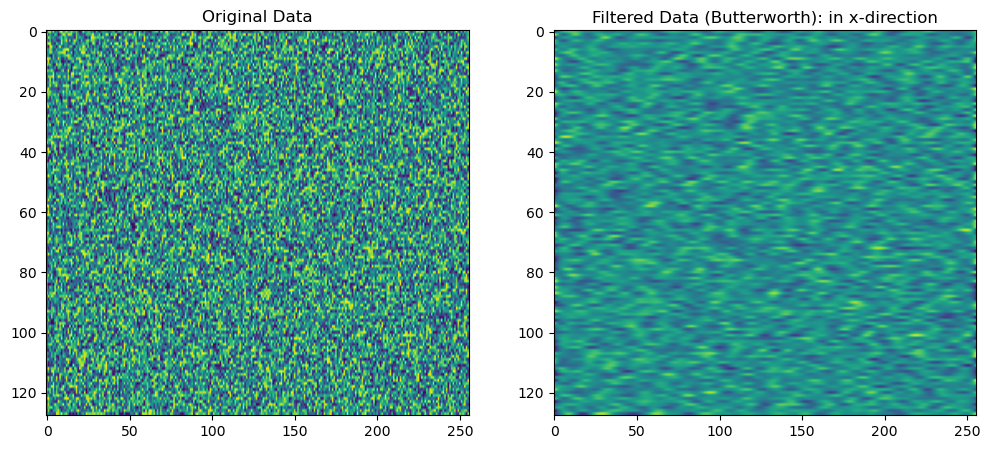

In [24]:
# Plot original and filtered data
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(da, cmap="viridis", aspect="auto")
ax[0].set_title("Original Data")
ax[1].imshow(filtered_da, cmap="viridis", aspect="auto")
ax[1].set_title("Filtered Data (Butterworth): in x-direction")
plt.show()

In [21]:
# Compute power spectrum for mean prediction and target
ps_filtered = xrft.power_spectrum(filtered_da, dim='x', window=True).mean(dim='y')
ps_unfiltered = xrft.power_spectrum(da, dim='x', window=True).mean(dim='y')

# Plot power spectra
plt.figure(figsize=(10, 6))
plt.plot(ps_filtered.freq_x, ps_filtered, label='Filtered', color='blue')
plt.plot(ps_unfiltered.freq_x, ps_unfiltered, label='Unfiltered', color='orange')

# Configure the plot
plt.title("Power Spectra of Filtered and Unfiltered Data")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.legend(loc='best')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()

# Display the plot
plt.show()


/srv/conda/envs/notebook/lib/python3.12/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.12/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(


Once again, a smooth dropoff after the cutoff frequency!

## Create Low-Pass Butterworth Filter in just the y-direction

In [23]:
filtered_data = signal.filtfilt(b_y, a_y, da, axis=0)
filtered_da = xr.DataArray(filtered_data, dims=['y', 'x'])
filtered_da

<xarray.DataArray (y: 128, x: 256)> Size: 262kB
array([[ 0.95694192,  0.14170175,  0.79048747, ...,  0.11477587,
         0.80047612,  0.49304336],
       [ 0.34299721,  0.55426724,  0.52502282, ..., -0.02020453,
         0.85859126,  0.65343969],
       [ 0.42502482,  0.41607798,  0.74903006, ...,  0.4273412 ,
         0.38428276,  0.27765347],
       ...,
       [ 0.26142061,  0.76699273,  0.64112783, ...,  0.23657019,
         0.33693822,  0.71706339],
       [ 0.13556138,  0.66710452,  0.42299117, ...,  0.27277144,
         0.14619146,  0.30641808],
       [ 0.63042785,  0.13701072,  0.35709113, ...,  0.26592487,
         0.25526149,  0.03243425]])
Dimensions without coordinates: y, x

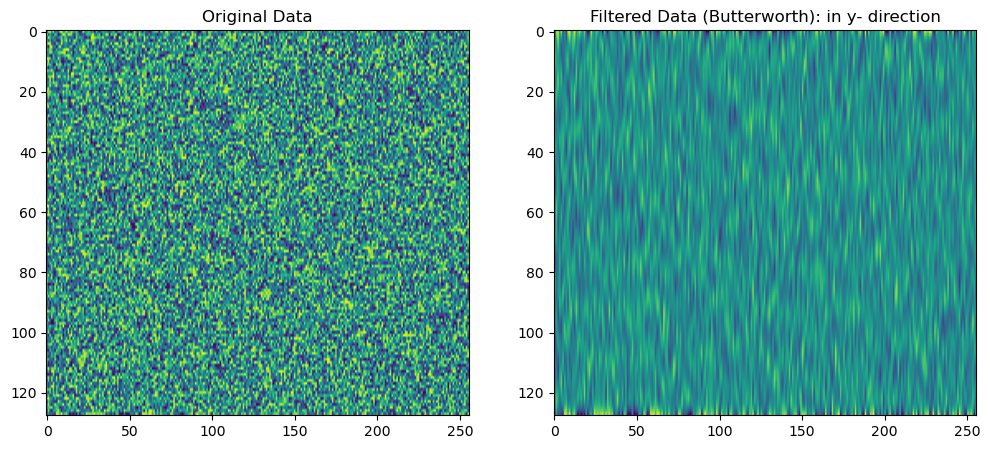

In [26]:
# Plot original and filtered data
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(da, cmap="viridis", aspect="auto")
ax[0].set_title("Original Data")
ax[1].imshow(filtered_da, cmap="viridis", aspect="auto")
ax[1].set_title("Filtered Data (Butterworth): in y- direction")
plt.show()

/srv/conda/envs/notebook/lib/python3.12/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.12/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(


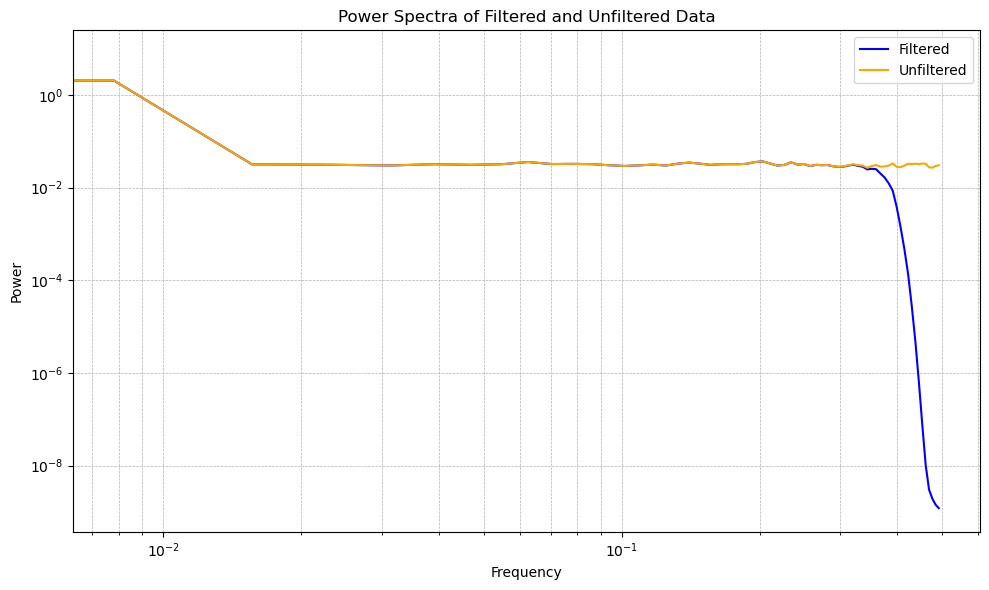

In [25]:
# Compute power spectrum for mean prediction and target
ps_filtered = xrft.power_spectrum(filtered_da, dim='y', window=True).mean(dim='x')
ps_unfiltered = xrft.power_spectrum(da, dim='y', window=True).mean(dim='x')

# Plot power spectra
plt.figure(figsize=(10, 6))
plt.plot(ps_filtered.freq_y, ps_filtered, label='Filtered', color='blue')
plt.plot(ps_unfiltered.freq_y, ps_unfiltered, label='Unfiltered', color='orange')

# Configure the plot
plt.title("Power Spectra of Filtered and Unfiltered Data")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.legend(loc='best')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()

# Display the plot
plt.show()


Here, we do not see a smooth dropoff after the cutoff frequency. Note that the order of averaging the x, y axes plays a significant tole in whether we see smooth dropoff or not!

Our intention was to compare the behavior of the scipy filters versus the corresponding gcm filters. A taper filter was used for the gcm filters code. The scipy taper filters smooth out behavior before the actual data is Fourier transformed, but don't actually filter out smaller scales, in the way that gcm filters does.